## Importing Necessary Libraries required for Stock Price Prediction Project Using Linear Regression Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Provided Dataset for project

In [2]:
dataset = pd.read_csv('D:/Minor_Project_Dataset.csv')

In [4]:
dataset.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


## Data Preprocessing

In [6]:
# We found that date datatype is object so, converting it to required datatype

if 'Date' in dataset.columns:
    dataset['Date'] = pd.to_datetime(dataset['Date'])

In [19]:
print(dataset['Date'].dtype)

datetime64[ns]


In [20]:
dataset

,Date,Open,High,Low,Adj Close,Volume,MA50,MA200,Volatility
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,420.197913,411.413249,12.027274
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,420.197913,411.413249,12.027274
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,420.197913,411.413249,12.027274
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,420.197913,411.413249,12.027274
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,420.197913,411.413249,12.027274
...,...,...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500,568.949401,560.237698,62.850482
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300,564.451600,559.751148,56.635882
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000,559.465201,559.150698,45.770030
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200,554.393201,558.634198,30.267854


In [8]:
# Dropping the 'Close' column as it is redundant

dataset = dataset.drop(columns=['Close'])

In [9]:
dataset

,Date,Open,High,Low,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900
...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200


## Feature Engineering

In [10]:
# Create moving averages, rolling metrics, and other technical indicators

dataset['MA50'] = dataset['Adj Close'].rolling(window=50).mean()
dataset['MA200'] = dataset['Adj Close'].rolling(window=200).mean()

# Short-term Volatility
dataset['Volatility'] = dataset['Adj Close'].rolling(window=10).std()


In [11]:
dataset

,Date,Open,High,Low,Adj Close,Volume,MA50,MA200,Volatility
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,NaN,NaN,NaN
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,NaN,NaN,NaN
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,NaN,NaN,NaN
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,NaN,NaN,NaN
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500,568.949401,560.237698,62.850482
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300,564.451600,559.751148,56.635882
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000,559.465201,559.150698,45.770030
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200,554.393201,558.634198,30.267854


In [12]:
# Checking number of null values column-wise after feature engineering

null_counts = dataset.isnull().sum()

print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
Date            0
Open            0
High            0
Low             0
Adj Close       0
Volume          0
MA50           49
MA200         199
Volatility      9
dtype: int64


In [16]:
# Replacing NaN values with mean

dataset['MA50'].fillna(dataset['MA50'].mean(), inplace=True)
dataset['MA200'].fillna(dataset['MA200'].mean(), inplace=True)
dataset['Volatility'].fillna(dataset['Volatility'].mean(), inplace=True)

In [17]:
dataset

,Date,Open,High,Low,Adj Close,Volume,MA50,MA200,Volatility
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,420.197913,411.413249,12.027274
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,420.197913,411.413249,12.027274
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,420.197913,411.413249,12.027274
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,420.197913,411.413249,12.027274
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,420.197913,411.413249,12.027274
...,...,...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500,568.949401,560.237698,62.850482
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300,564.451600,559.751148,56.635882
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000,559.465201,559.150698,45.770030
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200,554.393201,558.634198,30.267854


In [18]:
# Checking again for null values column-wise
null_counts = dataset.isnull().sum()

print("Number of null values in each column:")
print(null_counts)

Number of null values in each column:
Date          0
Open          0
High          0
Low           0
Adj Close     0
Volume        0
MA50          0
MA200         0
Volatility    0
dtype: int64


In [22]:
# Defining Features (X) and Target (y)

X = dataset[['Open', 'High', 'Low', 'Volume', 'MA50', 'MA200', 'Volatility']]
y = dataset['Adj Close']

## LR Model Training

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [24]:
# Feature Scaling (Important for models like Linear Regression)
scaler = StandardScaler()

# Scaling only the training data to avoid data leakage
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Model-Linear Regression

# Initialize and fit the Linear Regression model

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
# Make predictions using Linear Regression
lr_predictions = lr_model.predict(X_test_scaled)

## LR Model Evaluation

In [42]:
# Function to evaluate and print performance metrics
def evaluate_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} = RMSE: {rmse}, R2: {r2}")

evaluate_model("Linear Regression Model", y_test, lr_predictions)

Linear Regression Model = RMSE: 4.163231981216274, R2: 0.9965007153147475


In [28]:
# Cross-Validation

lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"Linear Regression CV RMSE: {np.mean(np.sqrt(-lr_cv_scores))}")

Linear Regression CV RMSE: 3.7091987786099665


## Data Visualization

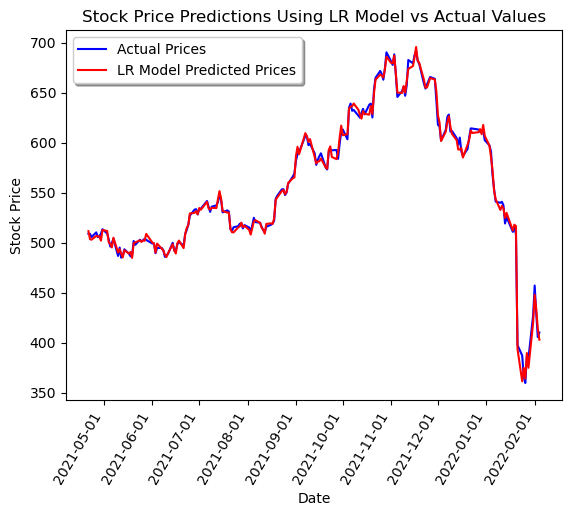

In [41]:
# Plotting actual stock prices
plt.plot(dataset['Date'].iloc[len(X_train):], y_test, color='blue', label='Actual Prices')


# Plottting predicted stock prices from LR Model
plt.plot(dataset['Date'].iloc[len(X_train):], lr_predictions, color='red', label='LR Model Predicted Prices')

plt.title('Stock Price Predictions Using LR Model vs Actual Values', loc='center')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation = 60, ha = 'right')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.legend(shadow = 'True')